In [5]:
import scanpy as sc
import scvelo as scv
import latentvelo as ltv
import numpy as np

In [6]:
adata =  sc.read('../../../../Ranek_purvis2022/adata_nestorowa.h5ad')
scv.pp.filter_genes(adata, min_shared_counts=30)
ltv.utils.standard_clean_recipe(adata, spliced_key='spliced', unspliced_key='unspliced',
                                 umap=True, log=True)

umap = adata.obsm['X_umap']
adata =  sc.read('../../../../Ranek_purvis2022/adata_nestorowa.h5ad')
adata.obsm['X_umap']= umap

Extracted 2000 highly variable genes.
computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [7]:
adata

AnnData object with n_obs × n_vars = 1772 × 3970
    obs: 'cell_IDs', 'cell_types_IDs', 'cell_types_broad', 'cell_types_fine', 'cell_types_broad_cleaned', 'n_counts', 'n_genes', 'mito_ratio', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'size_factors_x', 'size_factors_s', 'size_factors_u', 'leiden', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'fit_r2', 'velocity_genes', 'fit_diff_kinetics', 'fit_pval_kinetics'
    uns: 'cell_types_broad_cleaned_colors', 'hvg', 'leiden', 'neighbors', 'pca', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs', 'fit_pvals_kinetics', 'loss'
    l

In [8]:
scv.pp.filter_and_normalize(adata, min_shared_counts=30, n_top_genes=2000)

Extracted 2000 highly variable genes.


In [9]:
scv.pp.pca(adata)
scv.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)
#sc.tl.umap(adata)

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [10]:
scv.tl.recover_dynamics(adata, n_jobs=12)
scv.tl.velocity(adata, mode='dynamical', vkey='dynvelo', n_jobs=12)
scv.tl.velocity(adata, mode='stochastic', vkey='stocvelo', n_jobs=12)

recovering dynamics (using 12/16 cores)


  0%|          | 0/804 [00:00<?, ?gene/s]

    finished (0:00:19) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:03) --> added 
    'dynvelo', velocity vectors for each individual cell (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'stocvelo', velocity vectors for each individual cell (adata.layers)


In [11]:
scv.tl.velocity_graph(adata, vkey='dynvelo', n_jobs=12)
scv.tl.velocity_graph(adata, vkey='stocvelo', n_jobs=12)

computing velocity graph (using 12/16 cores)


  0%|          | 0/1772 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'dynvelo_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 12/16 cores)


  0%|          | 0/1772 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'stocvelo_graph', sparse matrix with cosine correlations (adata.uns)


In [12]:
adata.obs['celltypes'] = adata.obs['cell_types_broad_cleaned'].values
adata.obs['celltypes'] = [item.replace("_broad", "") for item in adata.obs['celltypes']]

In [13]:
cluster_edges = [
    ('LTHSC', 'MPP'), 
    ('MPP', 'LMPP'), ('MPP', 'CMP'), ('CMP','GMP'), ('CMP', 'MEP')]

In [14]:
scv.tl.velocity_embedding(adata, vkey='dynvelo', basis='pca')
dyn_pca = ltv.ev.cross_boundary_correctness(adata,
                                  'celltypes', 'dynvelo_pca', cluster_edges, x_emb='X_pca', 
                                   majority_vote=True, return_raw=True)

scv.tl.velocity_embedding(adata, vkey='stocvelo', basis='pca')
stoc_pca = ltv.ev.cross_boundary_correctness(adata,
                                  'celltypes', 'stocvelo_pca', cluster_edges, x_emb='X_pca', 
                                   majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:00) --> added
    'dynvelo_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'stocvelo_pca', embedded velocity vectors (adata.obsm)


In [15]:
adata.obsm['X_pca_10'] = adata.obsm['X_pca'][:,:10]

scv.tl.velocity_embedding(adata, vkey='dynvelo', basis='pca_10')
dyn_pca_10 = ltv.ev.cross_boundary_correctness(adata,
                                  'celltypes', 'dynvelo_pca_10', cluster_edges, x_emb='X_pca_10', 
                                   majority_vote=True, return_raw=True)

scv.tl.velocity_embedding(adata, vkey='stocvelo', basis='pca_10')
stoc_pca_10 = ltv.ev.cross_boundary_correctness(adata,
                                  'celltypes', 'stocvelo_pca_10', cluster_edges, x_emb='X_pca_10', 
                                   majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:00) --> added
    'dynvelo_pca_10', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'stocvelo_pca_10', embedded velocity vectors (adata.obsm)


In [16]:
dyn_pca_iccoh = ltv.ev.inner_cluster_coh(adata,
                                  'celltypes', 'dynvelo_pca', return_raw=True, layer=False)
dyn_pca_10_iccoh = ltv.ev.inner_cluster_coh(adata,
                                  'celltypes', 'dynvelo_pca_10', return_raw=True, layer=False)


stoc_pca_iccoh = ltv.ev.inner_cluster_coh(adata,
                                  'celltypes', 'stocvelo_pca', return_raw=True, layer=False)
stoc_pca_10_iccoh = ltv.ev.inner_cluster_coh(adata,
                                  'celltypes', 'stocvelo_pca_10', return_raw=True, layer=False)

In [17]:
np.save("fits/mouse_hematopoiesis_dynvelo_pca.npy", dyn_pca)
np.save("fits/mouse_hematopoiesis_dynvelo_pca_10.npy", dyn_pca_10)

np.save("fits/mouse_hematopoiesis_stocvelo_pca.npy", stoc_pca)
np.save("fits/mouse_hematopoiesis_stocvelo_pca_10.npy", stoc_pca_10)

np.save("fits/mouse_hematopoiesis_dynvelo_iccoh_pca.npy", dyn_pca_iccoh)
np.save("fits/mouse_hematopoiesis_dynvelo_iccoh_pca_10.npy", dyn_pca_10_iccoh)

np.save("fits/mouse_hematopoiesis_stoc_iccoh_pca.npy", stoc_pca_iccoh)
np.save("fits/mouse_hematopoiesis_stoc_iccoh_pca_10.npy", stoc_pca_10_iccoh)

computing velocity embedding
    finished (0:00:00) --> added
    'dynvelo_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_hematopoiesis.png


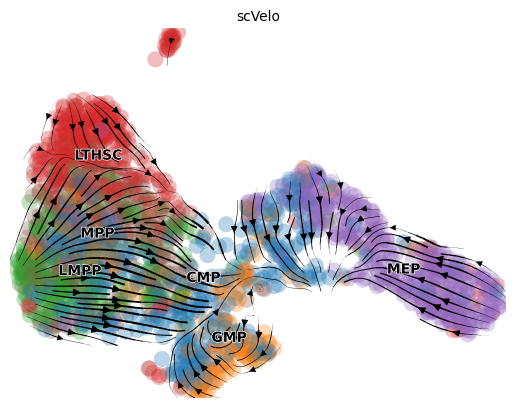

computing velocity embedding
    finished (0:00:00) --> added
    'stocvelo_umap', embedded velocity vectors (adata.obsm)


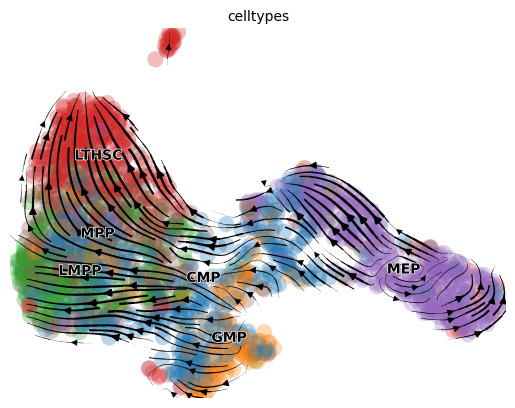

In [18]:
scv.pl.velocity_embedding_stream(adata, basis='umap',vkey='dynvelo', color=['celltypes'],title=['scVelo'], save='hematopoiesis.png')
scv.pl.velocity_embedding_stream(adata, vkey='stocvelo', color=['celltypes'])